In [21]:
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np

In [11]:
base_data_root = '../pavement crack datasets'
CFD_root = os.path.join(base_data_root, 'CFD')
CFD_imgs = os.path.join(CFD_root, 'cfd_image/cfd_image')

In [14]:
full_cfd = os.listdir(CFD_imgs)
print('full: ', len(full_cfd))

full:  156


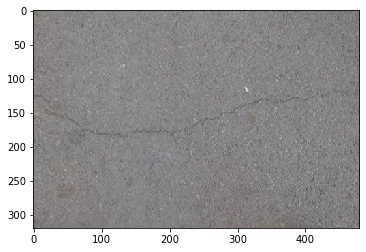

In [19]:
img_id = 10

img_example = cv2.imread(os.path.join(CFD_imgs, full_cfd[img_id]))
plt.imshow(img_example)

# image cropping (227x227)
## CFD

In [144]:
def cropping(mtx, out_size=(227, 227), step=(10,10)):
    extended_mtx_size = np.array((in_size[0]+(out_size[0] - in_size[0]%step[0]),
                             in_size[1]+(out_size[1] - in_size[1]%step[1]),
                             in_size[2])).astype(int)
    extended_mtx = np.full(extended_mtx_size, np.mean(mtx))
    extended_mtx[:in_size[0], 
                 :in_size[1],
                 :] = mtx
    result_list = []

    for iy in range(0, extended_mtx_size[1] - int(1.8*out_size[1]), step[1]):
        for ix in range(0, extended_mtx_size[0] - int(1.8* out_size[0]), step[0]):
            sub_mtx = extended_mtx[ix:ix+out_size[0],
                                   iy:iy+out_size[1],
                                   0]
            result_list.append(sub_mtx)
    result_mtx = np.array(result_list)
    return result_mtx

(3, <matplotlib.image.AxesImage at 0x1f3813bacc0>)

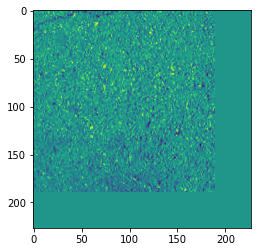

In [145]:
result_mtx = cropping(img_example)
len(result), plt.imshow(result_mtx[-1])

In [153]:

c=0
for im in result_mtx:
    cv2.imwrite(f'.png', result_mtx[-1])

In [154]:
!ls

Crack Detection.ipynb
data
models
name.png
README.md
Road-Cracks-Detection-Neural-Network--master
Untitled.ipynb
weights


# crop set

In [156]:
base_data_root = '../pavement crack datasets'
CFD_root = os.path.join(base_data_root, 'CFD')
CFD_imgs = os.path.join(CFD_root, 'cfd_image/cfd_image')
out_path = os.path.join(CFD_root, 'cropped_image')


full:  156


In [ ]:
def create_cropped_set(in_folder, out_folder):
    os.makedirs(out_folder, exist_ok=True)
    full_files = os.listdir(in_folder)
    print('full: ', len(full_files))
    for img_id in full_cfd:
        img_example = cv2.imread(os.path.join(in_folder, full_files[img_id]))
        result_mtx = cropping(img_example)
        c=0
        for im in result_mtx:
            out_path = os.path.join(out_folder, f'img_id_{c}.png')
            cv2.imwrite(out_path, result_mtx[-1])
            c+=1


In [ ]:
out_path = os.path.join(CFD_root, 'cropped_image')
create_cropped_set(CFD_imgs, out_path)